In [51]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import yfinance as yfin
import matplotlib
import matplotlib.pyplot as plt

In [268]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [130]:
yfin.pdr_override()
data_tesla = pdr.data.get_data_yahoo('TSLA')

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

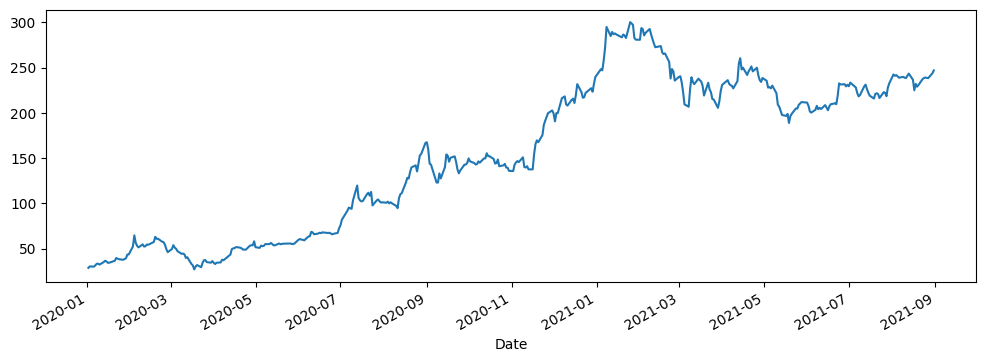

In [48]:
data_tesla.High.plot(figsize=(12,4))

In [50]:
data_tesla.loc['2020-01-01':'2021-09-01',:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2021-08-25,235.676666,238.990005,234.666672,237.066666,237.066666,37936800
2021-08-26,236.103333,238.466660,232.539993,233.720001,233.720001,39642900
2021-08-27,235.000000,238.333328,234.033340,237.306671,237.306671,41501400


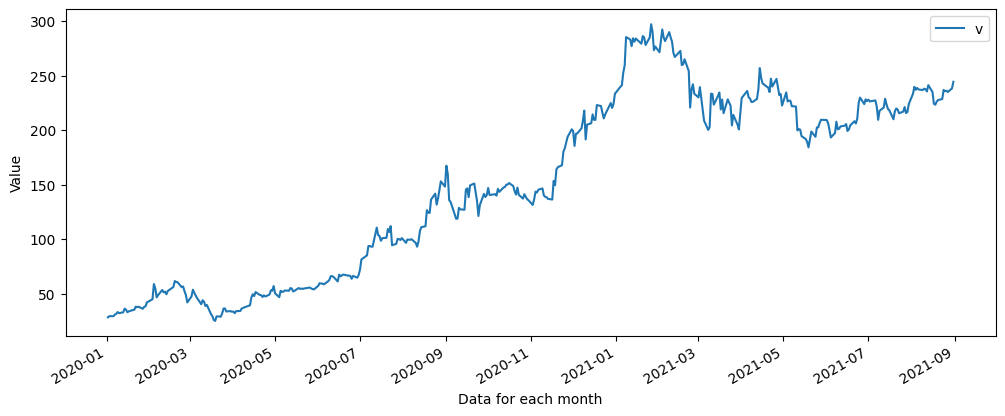

In [58]:
figure, axis = plt.subplots()
figure.autofmt_xdate()
figure.set_figwidth(12)
axis.plot(data_tesla.index, data_tesla.Open)
axis.set_xlabel('Data for each month')
axis.set_ylabel('Value')
axis.legend('val')

In [67]:
data_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 2020-01-02 to 2021-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       420 non-null    float64
 1   High       420 non-null    float64
 2   Low        420 non-null    float64
 3   Close      420 non-null    float64
 4   Adj Close  420 non-null    float64
 5   Volume     420 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 39.1 KB


In [72]:
current = dt.datetime.now()
current

datetime.datetime(2023, 8, 3, 13, 27, 35, 742076)

In [91]:
current.resolution

datetime.timedelta(microseconds=1)

In [85]:
current.toordinal()

738735

In [86]:
data_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2021-08-25,235.676666,238.990005,234.666672,237.066666,237.066666,37936800
2021-08-26,236.103333,238.466660,232.539993,233.720001,233.720001,39642900
2021-08-27,235.000000,238.333328,234.033340,237.306671,237.306671,41501400


# Rule codes
1. 'A'/'Y' - 'Yearly'
2. 'D' - 'Daily'
3. 'M' - 'Monthly'
4. 'QS' - 'Quarterly Start Frequency'
5. 'BA' - 'Business Annual'
6. 'BQS' - 'Business Quarterly Start'

<Axes: xlabel='Date'>

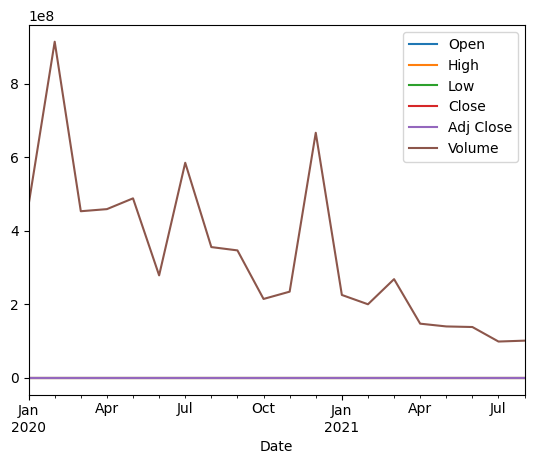

In [116]:

data_tesla.resample(rule='M').max().plot()

# Basic - Data smoothing using Rolling Window(Simple Moving Average)

In [129]:
data_tesla.Open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-25    235.676666
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
Name: Open, Length: 420, dtype: float64

In [128]:
data_tesla.Open.rolling(3).mean()

Date
2020-01-02           NaN
2020-01-03           NaN
2020-01-06     29.010445
2020-01-07     29.830445
2020-01-08     30.568223
                 ...    
2021-08-25    233.683329
2021-08-26    236.224442
2021-08-27    235.593333
2021-08-30    236.447779
2021-08-31    239.191111
Name: Open, Length: 420, dtype: float64

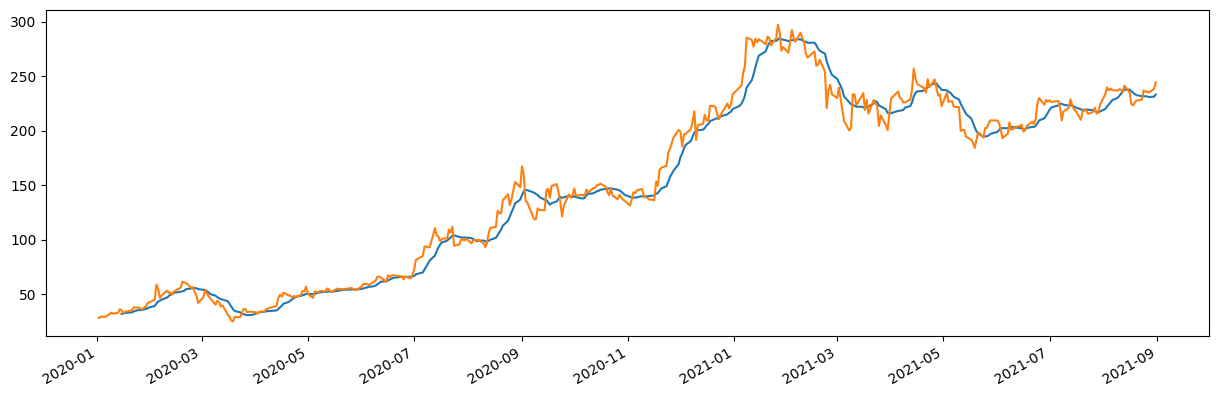

In [126]:
figure, axes = plt.subplots()
figure.autofmt_xdate()
figure.set_figwidth(15)
axes.plot(data_tesla.Open.rolling(10).mean())
axes.plot(data_tesla.Open)


# Types of Trends
### Upward Trend
### Downward Trend
### Stationary Data
### Cyclic Data

In [131]:
data_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111446000
2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200
2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000


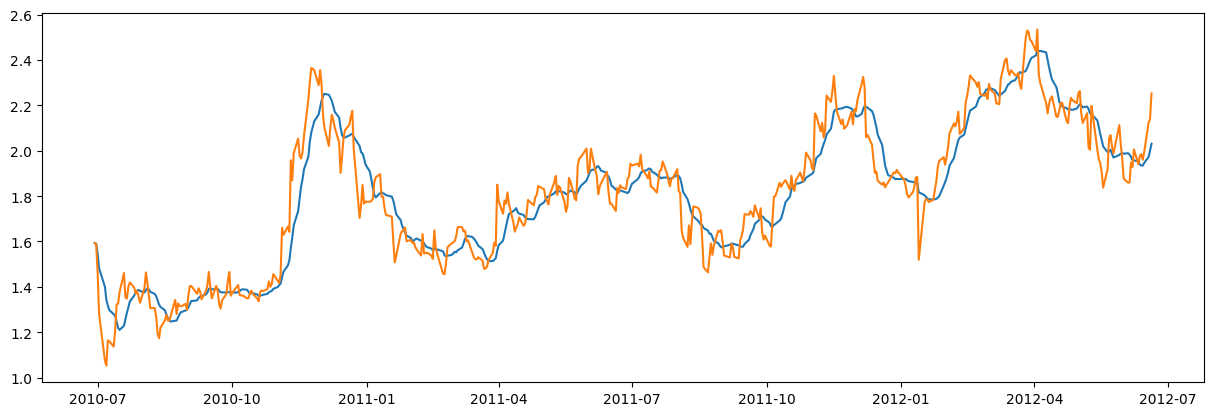

In [160]:
figure, axis = plt.subplots()
figure.set_figwidth(15)
axis.plot(data_tesla.Close[:500].rolling(10, min_periods=1).mean())
axis.plot(data_tesla.Close[:500])
# axis.set_xlim(2022, 2023)
# data_tesla.Close.rolling(10, min_periods=1).mean().plot()

# Cumulative Moving Average

<Axes: xlabel='Date'>

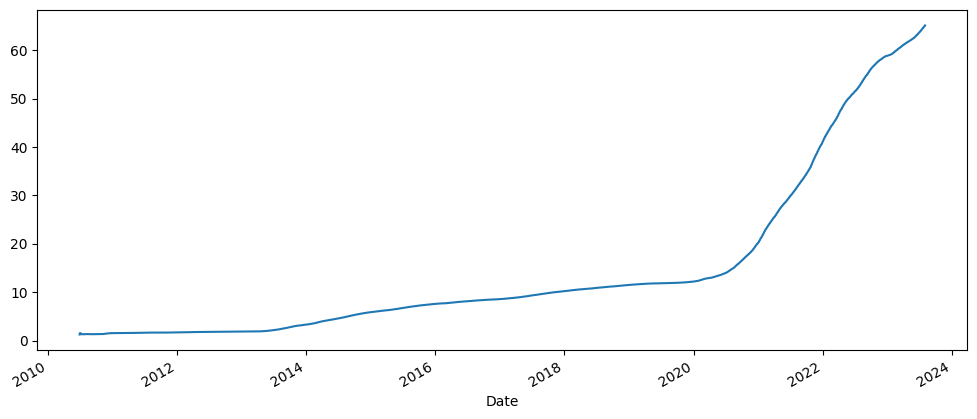

In [186]:
data_tesla.Open.expanding().mean().plot(figsize=(12,5))

In [ ]:
cmav = data_tesla.Open.expanding().mean()

In [178]:
cma = [data_tesla.Open[:i+1].mean() for i in range(len(data_tesla.Open))]

In [185]:
cmav == cma

Date
2010-06-29    True
2010-06-30    True
2010-07-01    True
2010-07-02    True
2010-07-06    True
              ... 
2023-07-28    True
2023-07-31    True
2023-08-01    True
2023-08-02    True
2023-08-03    True
Name: Open, Length: 3297, dtype: bool

# Exponential Weighted Moving Average/ Exponential Moving Average

In [203]:
def ema(data, alpha):
    ema = [data[0]]
    for i in range(1, len(data)):
        ema.append((1-alpha) * data[i] + alpha * ema[i-1])
    return ema

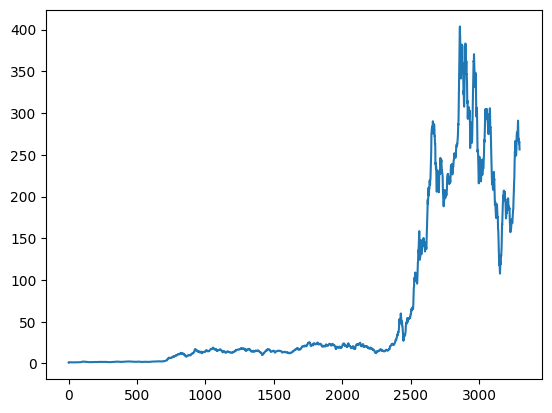

In [222]:
emwa = ema(data_tesla.Open, 0.5)
plt.plot(emwa)

<Axes: xlabel='Date'>

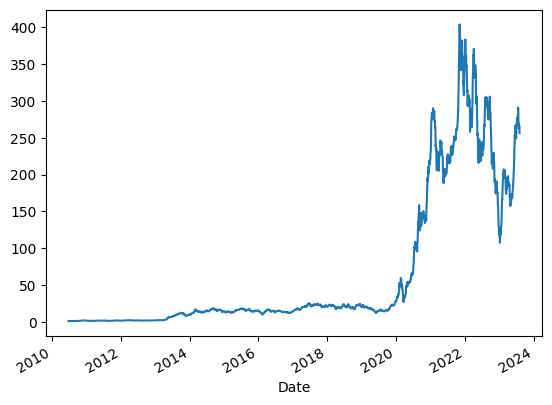

In [223]:
data_tesla['Open'].ewm(alpha=0.5).mean().plot()

# Seasonal Decompose to check for seasonality, trend and error components in the data

In [246]:
data_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2023-07-28,259.859985,267.250000,258.230011,266.440002,266.440002,111446000
2023-07-31,267.480011,269.079987,263.779999,267.429993,267.429993,84582200
2023-08-01,266.260010,266.470001,260.250000,261.070007,261.070007,83166000


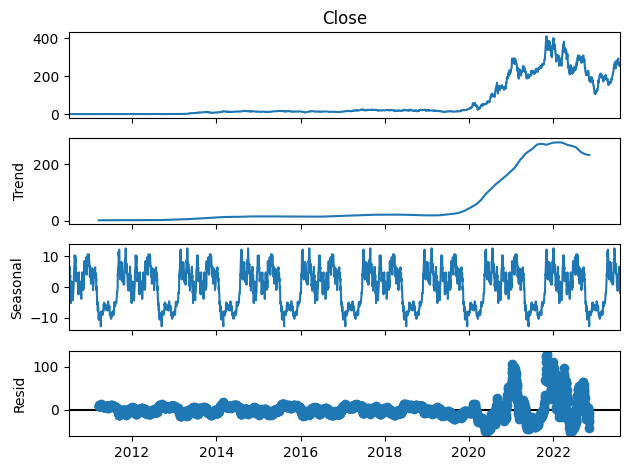

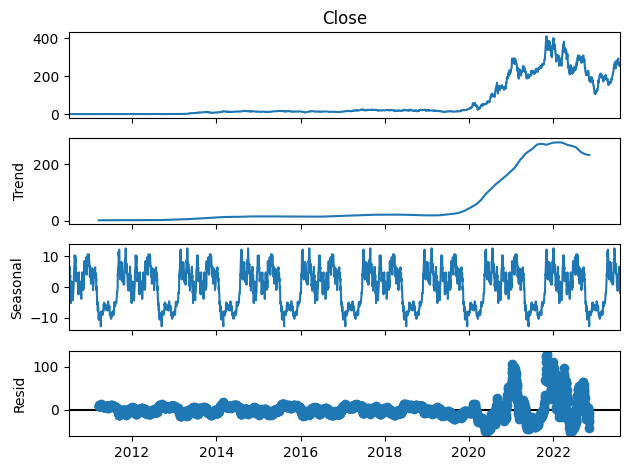

In [259]:
res = seasonal_decompose(data_tesla.Close, model="additive", period=365)
res.plot()

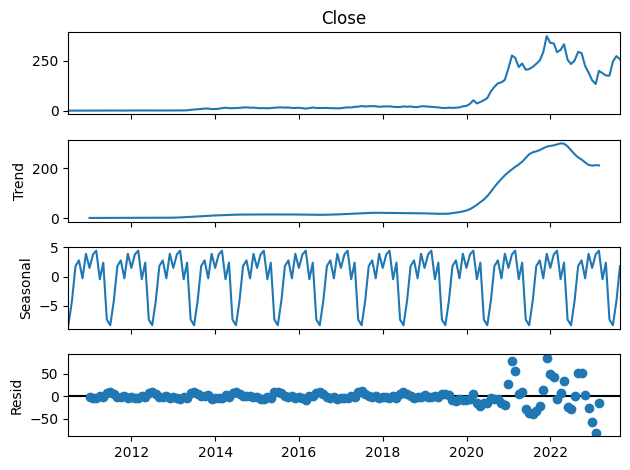

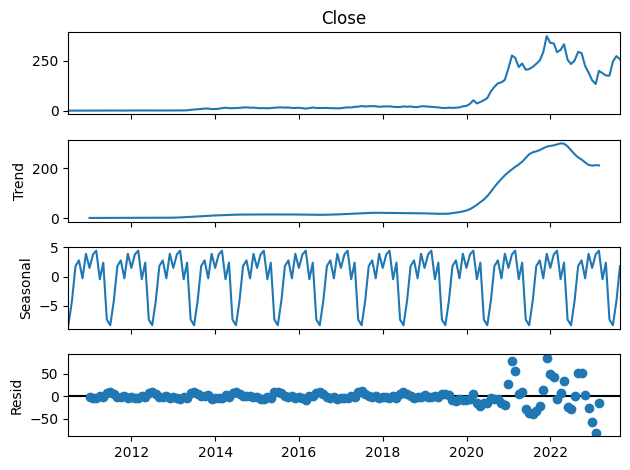

In [263]:
res_m = seasonal_decompose(data_tesla.resample(rule='M').mean().Close)
res_m.plot()

# ARIMA [Auto Regressive] + [Integrated] + [Moving Average]

### Auto Regressive - AR
- The AR component models the relationship between the current value of the time series and its past values.

- y(t) = c + φ₁ * y(t-1) + φ₂ * y(t-2) + ... + φₚ * y(t-p) + ε(t)

- y(t) is the current value of the time series.
- c is a constant term.
- φ₁, φ₂, ..., φₚ are the AR coefficients for the previous values.
- ε(t) is the white noise or error term at time t.

### Integrated - I
- The I component represents differencing the time series to make it stationary. Stationarity is a key assumption in ARIMA models. If the time series is not stationary (i.e., it has trends and seasonality), it needs to be differenced to remove these components.
- Stationary is achieved only if the mean, variance and autocorrelation of data are constant over time.
- Use Augmented Dickey-Fuller Test to check if the data is stationary or not.
- First-order differencing
    - Subtract the current value from previous value.
- Seasonal differencing
    - This involves subtracting each value from the corresponding value in the same season of the previous year or period.
- Higher-Order differencing
    - Apply first-order differencing and again apply first-order differencing to the differenced data.

### Moving Average - MA
- The MA component models the relationship between the current value of the time series and the past forecast errors

- y(t) = μ + ε(t) + θ₁ * ε(t-1) + θ₂ * ε(t-2) + ... + θ_q * ε(t-q)

- μ is the mean of the time series.
- θ₁, θ₂, ..., θ_q are the MA coefficients for the past forecast errors.
- ε(t) is the white noise or error term at time t.

### Partial Auto-Correlation Function - PACF plot to get the order of P for AR(P)

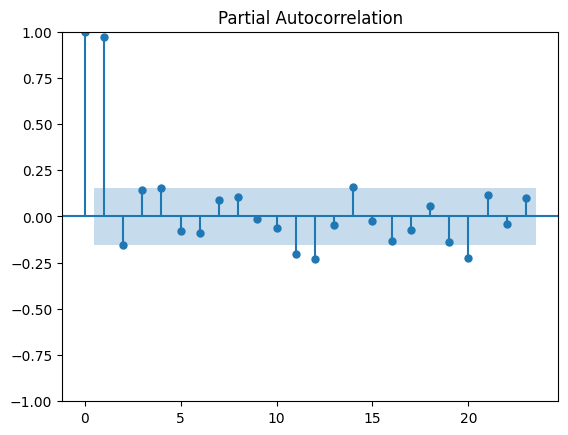

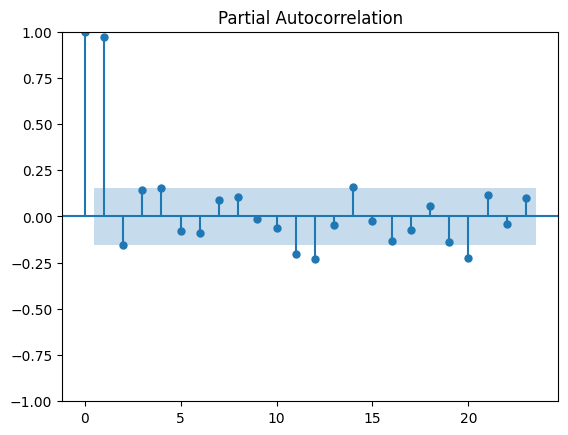

In [287]:
# figure, axis = plt.subplots(2)
plot_pacf(data_tesla.resample(rule='M').mean().Close)
# plot_acf(data_tesla.Close.diff().dropna(), ax=axis[1])

### Auto-Correlation Function - ACF to find the order of q, MA(q)

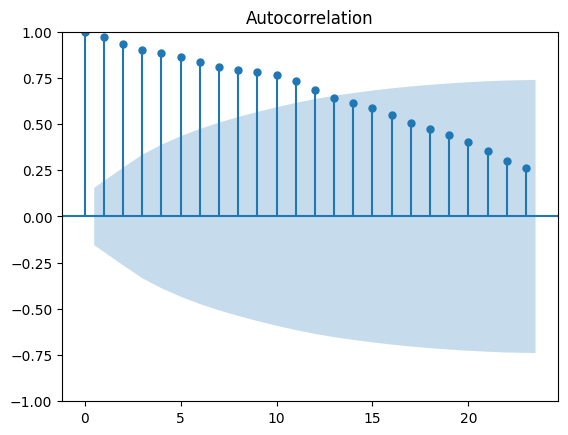

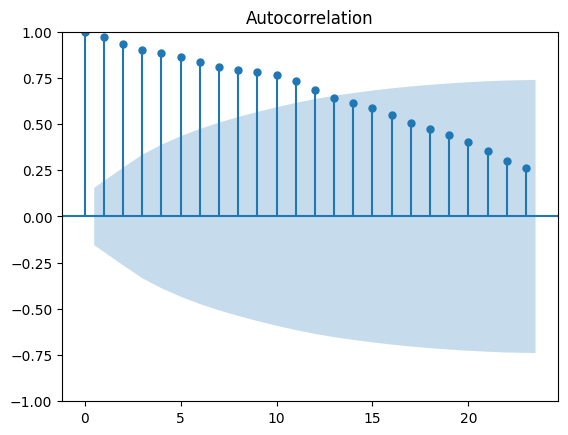

In [288]:
plot_acf(data_tesla.resample(rule='M').mean().Close)

### Akaike Information Criterion - AIC to get the best model, similar to hyper-parameter tuning in Regession/CLassification models

In [291]:
data_tesla.Close.resample(rule='M').mean()

Date
2010-06-30      1.590667
2010-07-31      1.303873
2010-08-31      1.300727
2010-09-30      1.382698
2010-10-31      1.380889
                 ...    
2023-04-30    176.955262
2023-05-31    175.799090
2023-06-30    246.090476
2023-07-31    273.505500
2023-08-31    257.156672
Freq: M, Name: Close, Length: 159, dtype: float64

In [290]:
from itertools import product
from sklearn.metrics import mean_squared_error as mse

p=range(0,8)
q=range(0,8)
d=range(0,2)

for i in list(product(p,d,q)):
    model = ARIMA(data_tesla.Close.resample(rule='M').mean()).fit()
    pred = model.predict(start='2023-08-31', end='2024-08-31')
    error = 

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,